# Cis contact heatmap
In this section, we demonstrate how to generate various types of Hi-C cis contact heatmaps

### test data
Test data were origin from  https://doi.org/10.1002/advs.202200818

you can download form this url: https://github.com/seqyuan/trackc_data/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys,os
import cooler
import trackc as tc

HPDE6C7_chr18_25k = cooler.Cooler('./HPDE6C7.chr18.mcool::/resolutions/25000')
BxPC3_chr18_25k = cooler.Cooler('./BxPC3.chr18.mcool::/resolutions/25000')


HPDE6C7_chr18_50k = cooler.Cooler('./HPDE6C7.chr18.mcool::/resolutions/50000')
BxPC3_chr18_50k = cooler.Cooler('./BxPC3.chr18.mcool::/resolutions/50000')


In [12]:
region="18:10000000-14500000"

normal = tc.tl.extractCisContact(clr=HPDE6C7_chr18_25k, region=region, extend=0)
tumor = tc.tl.extractCisContact(clr=BxPC3_chr18_25k, region=region, extend=50)

no max min range
maxrange: 296.0 minrange: 1.0
no max min range
maxrange: 296.0 minrange: 1.0
no max min range
maxrange: 296.0 minrange: 1.0
no max min range
maxrange: 248.0 minrange: 1.0
no max min range
maxrange: 248.0 minrange: 1.0
no max min range
maxrange: 248.0 minrange: 1.0


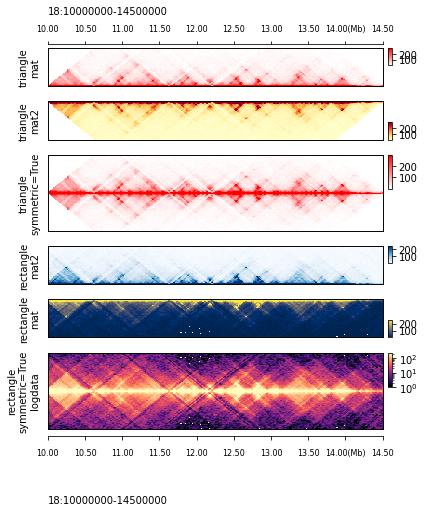

In [17]:
fig, axs = tc.make_spec(figsize=(6, 7), height_ratios=[1,1,2,1,1,2], hspace=0.3)

tc.pl.mapC(ax=axs[0], mat=normal, label='triangle\nmat', 
           map_type='tri',  height=50)
tc.pl.mapC(ax=axs[1], mat2=normal, label='triangle\nmat2', 
           map_type='tri',  height=50)

tc.pl.mapC(ax=axs[2], mat=normal, label='triangle\nsymmetric=True',
           map_type='tri',  height=50, symmetric=True)

tc.pl.mapC(ax=axs[3], mat=tumor, label='rectangle\nmat2', 
           map_type='rec', height=50, cmap='Blues')
tc.pl.mapC(ax=axs[4], mat2=tumor, label='rectangle\nmat',
           map_type='rec', height=50, cmap='cividis')

tc.pl.mapC(ax=axs[5], mat=tumor, label='rectangle\nsymmetric=True\nlogdata',
           map_type='rec', height=50, symmetric=True, logdata=True, cmap='magma')


tc.pl.scale_track(axs[5], region=region, scale_adjust='Mb', tick_pos='bottom', ratio2ax=0.9)
tc.pl.scale_track(axs[0], region=region, scale_adjust='Mb', tick_pos='top', ratio2ax=1)
#tc.savefig('trackc_mapc1.pdf')

no max min range
maxrange: 296.0 minrange: 1.0
no max min range
maxrange: 296.0 minrange: 1.0
no max min range
maxrange: 248.0 minrange: 1.0
no max min range
maxrange: 248.0 minrange: 1.0
no max min range
maxrange: 296.0 minrange: 1.0
no max min range
maxrange: 248.0 minrange: 1.0
no max min range
maxrange: 248.0 minrange: 1.0
no max min range
maxrange: 248.0 minrange: 1.0


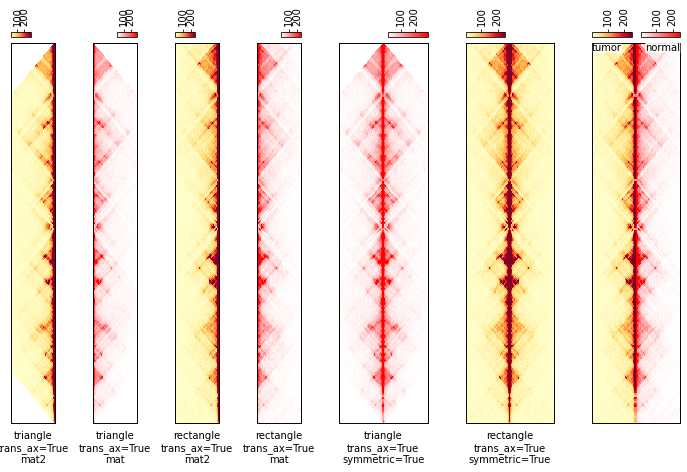

In [24]:
fig, axs = tc.make_spec(figsize=(12,7), width_ratios=[1,1,1,1,2,2,2], wspace=0.6)

tc.pl.mapC(ax=axs[0], mat2=normal, label='triangle\ntrans_ax=True\nmat2', 
           map_type='tri',  height=50, trans_ax=True)
tc.pl.mapC(ax=axs[1], mat=normal, label='triangle\ntrans_ax=True\nmat', 
           map_type='tri',  height=50, trans_ax=True)

tc.pl.mapC(ax=axs[2], mat2=tumor, label='rectangle\ntrans_ax=True\nmat2', 
           map_type='rec', height=50, trans_ax=True)
tc.pl.mapC(ax=axs[3], mat=tumor, label='rectangle\ntrans_ax=True\nmat',
           map_type='rec', height=50, trans_ax=True)

tc.pl.mapC(ax=axs[4], mat=normal, label='triangle\ntrans_ax=True\nsymmetric=True',
           map_type='tri',  height=50, trans_ax=True, symmetric=True)
tc.pl.mapC(ax=axs[5], mat2=tumor, label='rectangle\ntrans_ax=True\nsymmetric=True',
           map_type='rec', height=50, trans_ax=True, symmetric=True)
tc.pl.mapC(ax=axs[6], mat=tumor, mat2=tumor, label=['normal', 'tumor'],
           map_type='rec', height=50, trans_ax=True, symmetric=True)


In [2]:
region="18:64000000-71000000"
normal_2 = tc.tl.extractCisContact(clr=HPDE6C7_chr18_50k, region=region)
tumor_2 = tc.tl.extractCisContact(clr=BxPC3_chr18_50k, region=region)

no max min range
maxrange: 857.0 minrange: 1.0
no max min range
maxrange: 772.0 minrange: 1.0
maxrange: 500 minrange: 1.0
maxrange: 500 minrange: 1.0


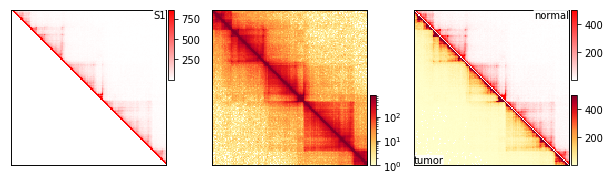

In [3]:
fig, axs = tc.make_spec(figsize=(10,4), width_ratios=[1,1,1], wspace=0.3)

tc.pl.mapC(mat=normal_2, ax=axs[0], map_type='squ', label='S1', aspect=1)
tc.pl.mapC(mat2=tumor_2, ax=axs[1], map_type='squ', symmetric=True, aspect=1, logdata=True)
tc.pl.mapC(mat=normal_2, mat2=tumor_2, ax=axs[2], map_type='squ', aspect=1, maxrange=500, label=['normal', 'tumor'])

fig.tight_layout()

maxrange: 600 minrange: 1.0
maxrange: 600 minrange: 1.0
maxrange: 500 minrange: 1.0
maxrange: 500 minrange: 1.0


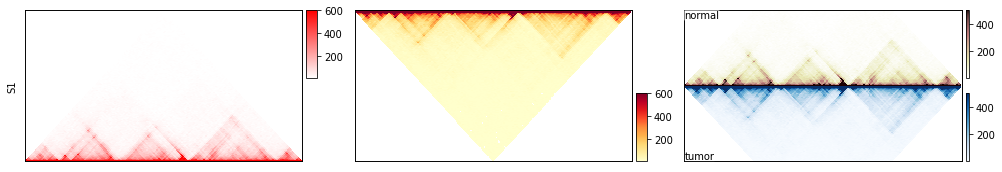

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(14,2.5))

tc.pl.mapC(mat=normal_2, ax=axs[0], map_type='triangle', label='S1', maxrange=600)
tc.pl.mapC(mat2=tumor_2, ax=axs[1], map_type='triangle', logdata=False, maxrange=600)
tc.pl.mapC(mat=normal_2, mat2=tumor_2, ax=axs[2], map_type='triangle', 
           cmap=['pink_r','Blues'],
           height=70, maxrange=500, label=['normal', 'tumor'])

fig.tight_layout()

maxrange: 600 minrange: 1.0
maxrange: 600 minrange: 1.0
maxrange: 500 minrange: 1.0
maxrange: 500 minrange: 1.0


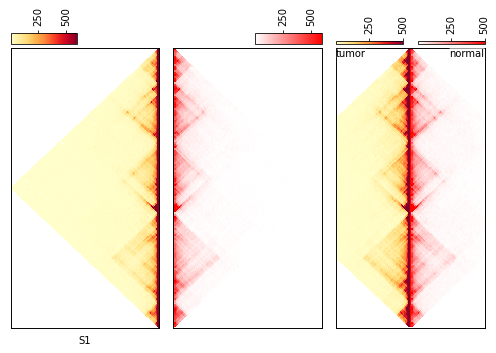

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(7,5))

tc.pl.mapC(mat2=normal_2, ax=axs[0], map_type='tri', label='S1', maxrange=600, trans_ax=True)
tc.pl.mapC(mat=tumor_2, ax=axs[1], map_type='tri', logdata=False, maxrange=600, trans_ax=True)
tc.pl.mapC(mat=normal_2, mat2=tumor_2, ax=axs[2], map_type='triangle', height=70, maxrange=500, 
           label=['normal', 'tumor'], trans_ax=True)

fig.tight_layout()

maxrange: 500 minrange: 1.0
maxrange: 500 minrange: 1.0


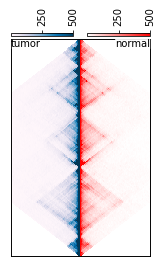

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(2.5, 4))
tc.pl.mapC(mat=normal_2, mat2=tumor_2, ax=axs, map_type='triangle', 
           height=70, maxrange=500, cmap=[tc.pa.fruitpunch, 'PuBu'],
           label=['normal', 'tumor'], trans_ax=True)
